## 목표
>- 500명의 키와 몸무게, 비만도 라벨을 이용하여 비만 판단하는 모델을 만들어 보장

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from matplotlib import font_manager , rc
font_name = font_manager.FontProperties( fname = "c:/Windows/Fonts/malgun.ttf").get_name()

### 데이터 로드

In [2]:
bmi = pd.read_csv('bmi_500.csv') # bmi_500 파일을 읽어 dataframe으로 저장
bmi.head() #상위 5개 추출
bmi.tail() #하위 5개 추출

,Gender,Height,Weight,Label
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity
499,Male,173,131,Extreme Obesity


In [3]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [4]:
bmi.describe() #데이터 분포 확인

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [5]:
bmi[bmi['Label']=='Normal'] #boolean indexing : True에 해당하는 행만 추출

,Gender,Height,Weight,Label
1,Male,189,87,Normal
10,Male,195,81,Normal
13,Male,155,51,Normal
14,Male,191,79,Normal
24,Female,172,67,Normal
...,...,...,...,...
472,Female,178,65,Normal
477,Male,167,64,Normal
478,Female,151,55,Normal
487,Male,187,80,Normal


In [6]:
bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

In [7]:
m_label = bmi['Label'].unique() #레이블 중복제거

In [8]:
def mScatter(m_label, m_color) :
    tmp = bmi[bmi['Label'] == m_label] 
    plt.scatter(tmp['Weight'],
                tmp['Height'],
                c = m_color, 
                label = m_label)

### 시각화하기

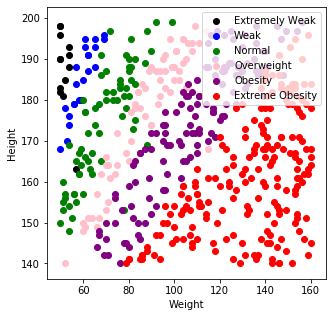

In [9]:
plt.figure(figsize = (5, 5))
mScatter('Extremely Weak' ,'black')
mScatter('Weak' ,'blue')
mScatter('Normal' ,'green')
mScatter('Overweight' ,'pink')
mScatter('Obesity' ,'purple')
mScatter('Extreme Obesity' ,'red')

plt.legend(loc = 'upper right')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

### 모델링 처리 과정
1. 데이터 로드
2. 문제와 답 분리
3. 훈련 셋과 검증셋 분리(일반적으로,, 7 : 3 비율)
4. 모델 생성(하이퍼파라미터 조정)
5. 학습 수행
6. 평가 수행

In [10]:
# 1. 데이터 로딩
data = pd.read_csv('bmi_500.csv')
data.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [11]:
# 2. 문제와 답 분리
X = data.loc[:,"Height":"Weight"]
y = data.loc[:,'Label']

In [12]:
#데이터 크기 확인
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [13]:
# 3. 데이터 훈련, 검증셋으로 분리 (7 : 3)
X_train = X.iloc[:350] 
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(350, 2)
(350,)
(150, 2)
(150,)


### KNN(K - Nearest Neighbors : 최근접이웃 알고리즘)

- 작은 데이터셋 일 경우, 다른 모델 선택 전 test 목적으로 주로 사용됨
- 이후 복잡한 모델 선택하여 다시 학습
- 분류를 위한 최근접 이웃의 대표적 알고리즘

In [15]:
# 4. 모델생성
model = KNeighborsClassifier(n_neighbors= 9)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [16]:
# 5. 모델평가
pre = model.predict(X_test)
metrics.accuracy_score(y_test,pre)

0.9133333333333333

### 내 몸무게, 키 입력하여 비만도 예측해보자

In [17]:
my = [[170,50]]

In [18]:
pre = model.predict(my)
print(pre)

['Normal']


### 과대/과소적합 확인

- 만든 모델의 훈련스코어와 검증스코어를 도출하여 훈련과 검증 효율을 분석하자*^-^*
- 훈련용 문제 데이터 셋을 입력하여 pre_train 변수에 정답 저장


In [19]:
pre_train = model.predict(X_train)

- 앞에서 수행한 훈련용 문제 데이터셋에 대한 모델 도출결과와 훈련용 정답셋을 비교하여 </n> 훈련용 데이터에 대한 스코어 도출
- F1-measure 도출

In [20]:
metrics.accuracy_score(pre_train, y_train)

0.9057142857142857

### 전체적인 스코어를 출력해보자

In [21]:
print(classification_report(pre_train,y_train))

                 precision    recall  f1-score   support

Extreme Obesity       0.99      0.96      0.97       140
 Extremely Weak       0.90      0.75      0.82        12
         Normal       0.82      0.90      0.86        40
        Obesity       0.91      0.89      0.90        97
     Overweight       0.84      0.85      0.84        54
           Weak       0.55      0.86      0.67         7

       accuracy                           0.91       350
      macro avg       0.83      0.87      0.84       350
   weighted avg       0.91      0.91      0.91       350



### Score 함수 사용

In [22]:
model.score(X_test,y_test)

0.9133333333333333

In [23]:
model.score(X_train,y_train)


0.9057142857142857

### hyperparameter tuning

- 몇 명의 이웃을 설정하는 것이 가장 적합한지 시각화를 수행해 보자!

In [24]:
train_acc = []
test_acc = []

neighbor = range (1, 11)

for i in neighbor :
    model = KNeighborsClassifier( n_neighbors = i)
    model.fit(X_train, y_train)
    
    train_acc.append(model.score(X_train,y_train))
    test_acc.append(model.score(X_test,y_test))        

In [25]:
print(train_acc)
print(test_acc)

[1.0, 0.9485714285714286, 0.9342857142857143, 0.9485714285714286, 0.9257142857142857, 0.9085714285714286, 0.9028571428571428, 0.9057142857142857, 0.9057142857142857, 0.9085714285714286]
[0.8866666666666667, 0.8933333333333333, 0.8933333333333333, 0.8933333333333333, 0.9066666666666666, 0.92, 0.9, 0.9066666666666666, 0.9133333333333333, 0.9333333333333333]


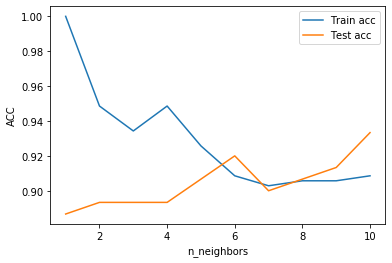

In [26]:
# 훈련데이터 정확도가 테스트 데이터 정확도보다 더 낮음 : 과소적합!
# 훈련데이터 정확도가 테스트 데이터 정확도보다 더 높음 : 과대적합!
# 일반적으로 훈련데이터 정확도가 더 높음
plt.plot(neighbor, train_acc, label = 'Train acc')
plt.plot(neighbor, test_acc, label = 'Test acc')
plt.legend(loc = 'best')
plt.ylabel('ACC')
plt.xlabel('n_neighbors')
plt.show()

### 성별 컬럼을 추가하여 학습해보자 ^-^

In [27]:
data = pd.read_csv('bmi_500.csv')

## 성별을 수치 데이터로 변환 One hot encoding

In [28]:
## map 함수 : 앞 값을 뒤 값으로 변환시켜줌
data['Gender'] = data['Gender'].map({"Male" : 0 , "Female" : 1}) 

In [29]:
data.head()

,Gender,Height,Weight,Label
0,0,174,96,Obesity
1,0,189,87,Normal
2,1,185,110,Obesity
3,1,195,104,Overweight
4,0,149,61,Overweight


In [30]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [31]:
X

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61
...,...,...,...
495,1,150,153
496,1,184,121
497,1,141,136
498,0,150,95


In [32]:
X_train2 = X.iloc[:350,:]
X_test2 = X.iloc[350:,:]

y_train2 = y.iloc[:350]
y_test2 = y.iloc[350:]

In [33]:
print(X_train2.shape)
print(y_train2.shape)

print(X_test2.shape)
print(y_test2.shape)

(350, 3)
(350,)
(150, 3)
(150,)


## 모델설정

In [34]:
model = KNeighborsClassifier(n_neighbors= 11)
model.fit(X_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [35]:
model.score(X_train2, y_train2)

0.9085714285714286

In [36]:
model.score(X_test2, y_test2)

0.8866666666666667

## feature를 하나 추가하여 과소적합 개선

In [38]:
from matplotlib import font_manager , rc
font_name = font_manager.FontProperties( fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

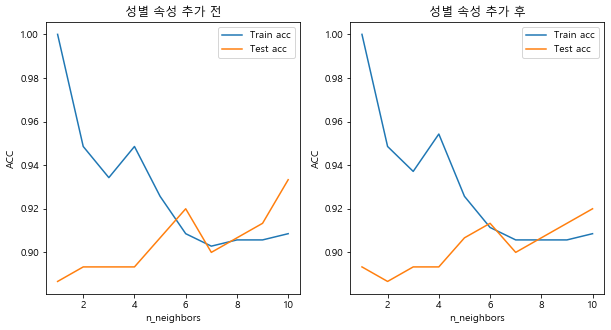

In [40]:
train_acc2 = []
test_acc2 = []

neighbor = range (1, 11)

for i in neighbor :
    model = KNeighborsClassifier( n_neighbors = i)
    model.fit(X_train2, y_train2)
    
    train_acc2.append(model.score(X_train2,y_train2))
    test_acc2.append(model.score(X_test2,y_test2))      

plt.figure(figsize= (10,5))
plt.subplot(1,2,1) #1행 2열 1번째 차트 명시

plt.plot(neighbor, train_acc, label = 'Train acc')
plt.plot(neighbor, test_acc, label = 'Test acc')
plt.legend(loc = 'best')
plt.ylabel('ACC')
plt.xlabel('n_neighbors')
plt.title('성별 속성 추가 전')

plt.subplot(1,2,2) #1행 2열 2번째 차트 명시
plt.plot(neighbor, train_acc2, label = 'Train acc')
plt.plot(neighbor, test_acc2, label = 'Test acc')
plt.legend(loc = 'best')
plt.ylabel('ACC')
plt.xlabel('n_neighbors')
plt.title('성별 속성 추가 후')

plt.show()

## 특성 추출
### 특성 추출을 통해 과소적합 해결

In [41]:
X_train3 = X_train.copy()
col = X_train3.columns

for i in range( col.size ) :
    for j in range( i, col.size ) :
        X_train3[col[i]+'x'+col[j]] = X_train3[col[i]]*X_train3[col[j]]
        
X_train3

,Height,Weight,HeightxHeight,HeightxWeight,WeightxWeight
0,174,96,30276,16704,9216
1,189,87,35721,16443,7569
2,185,110,34225,20350,12100
3,195,104,38025,20280,10816
4,149,61,22201,9089,3721
...,...,...,...,...,...
345,184,106,33856,19504,11236
346,191,68,36481,12988,4624
347,162,58,26244,9396,3364
348,178,138,31684,24564,19044


In [46]:
X_test3 = X_test.copy()
col = X_test3.columns

for i in range( col.size ) :
    for j in range( i, col.size ) :
        X_test3[col[i]+'x'+col[j]] = X_test3[col[i]]*X_test3[col[j]]
        
X_test3

,Height,Weight,HeightxHeight,HeightxWeight,WeightxWeight
350,184,83,33856,15272,6889
351,197,88,38809,17336,7744
352,160,51,25600,8160,2601
353,184,153,33856,28152,23409
354,190,50,36100,9500,2500
...,...,...,...,...,...
495,150,153,22500,22950,23409
496,184,121,33856,22264,14641
497,141,136,19881,19176,18496
498,150,95,22500,14250,9025


In [47]:
model.fit(X_train3, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [48]:
model.score(X_train3, y_train)

0.9

In [50]:
model.score(X_test3, y_test)

0.8866666666666667

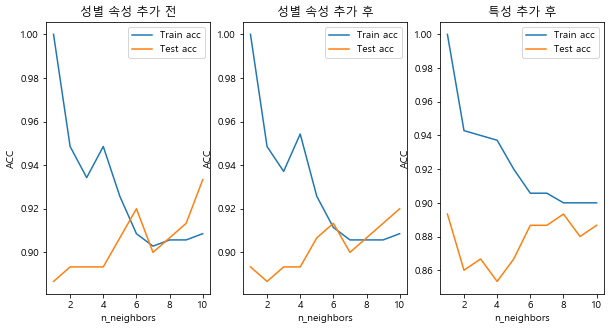

In [51]:
train_acc3 = []
test_acc3 = []

neighbor = range (1, 11)

for i in neighbor :
    model = KNeighborsClassifier( n_neighbors = i)
    model.fit(X_train3, y_train)
    
    train_acc3.append(model.score(X_train3,y_train))
    test_acc3.append(model.score(X_test3,y_test))      

plt.figure(figsize= (10,5))
plt.subplot(1,3,1) 
plt.plot(neighbor, train_acc, label = 'Train acc')
plt.plot(neighbor, test_acc, label = 'Test acc')
plt.legend(loc = 'best')
plt.ylabel('ACC')
plt.xlabel('n_neighbors')
plt.title('성별 속성 추가 전')

plt.subplot(1,3,2) 
plt.plot(neighbor, train_acc2, label = 'Train acc')
plt.plot(neighbor, test_acc2, label = 'Test acc')
plt.legend(loc = 'best')
plt.ylabel('ACC')
plt.xlabel('n_neighbors') 
plt.title('성별 속성 추가 후')

plt.subplot(1,3,3) 
plt.plot(neighbor, train_acc3, label = 'Train acc')
plt.plot(neighbor, test_acc3, label = 'Test acc')
plt.legend(loc = 'best')
plt.ylabel('ACC')
plt.xlabel('n_neighbors')
plt.title('특성 추가 후')

plt.show()

In [54]:
from sklearn.tree import DecisionTreeClassifier


In [55]:
model = DecisionTreeClassifier()

In [57]:
model.fit(X_test3,y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
model.feature_importances_

array([0.31065937, 0.2248999 , 0.13022397, 0.05707484, 0.27714192])

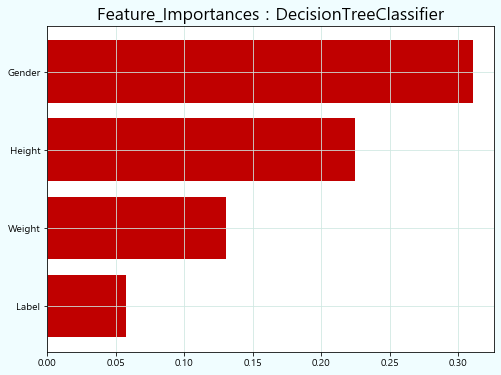

In [64]:
mpotances = model.feature_importances_
feature_list = list(zip(model.feature_importances_,data.columns))
feature_list.sort(reverse=True)
feature_list=feature_list[:20]
feature_list.sort(reverse=False)
feature_df = pd.DataFrame(feature_list,columns=["score","feature"])
plt.figure(figsize=(8,6),facecolor="#F0FDFF")
plt.title("Feature_Importances : {}".format(str(model).split("(")[0]), fontsize="xx-large")
plt.barh(feature_df["feature"],feature_df["score"],color="#C00000")
plt.grid(color="#CFE8E1")